<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_cluster_data(y_hat)_multi_delta_(1_2)_n20_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication/multiplication_delta_1.2'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_1.2_n20.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,27.014507,36.748281,76.172083,-2.585454,147.349417,151.260166,-3.910750
1,0.0,1.0,54.184983,68.692260,80.434445,10.790191,224.101879,212.747007,11.354873
2,0.0,2.0,74.815752,67.254373,79.013553,-3.089721,227.993956,227.645593,0.348363
3,0.0,3.0,86.067168,59.493031,21.920035,26.271482,203.751715,179.822243,23.929472
4,0.0,4.0,77.644617,32.281041,38.640408,0.586000,159.152066,157.548207,1.603859
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,65.428637,31.043319,58.527285,6.263178,171.262420,172.170094,-0.907674
19996,999.0,16.0,59.848544,88.267793,90.588043,0.144942,248.849323,248.521688,0.327634
19997,999.0,17.0,95.074489,20.982394,70.948616,12.162555,209.168054,207.167636,2.000418
19998,999.0,18.0,31.473663,61.754588,51.166493,11.588973,165.983716,155.756908,10.226808


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3          e           Y  \
rep   index                                                           
0.0   0.0    27.014507  36.748281  76.172083  -2.585454  147.349417   
      1.0    54.184983  68.692260  80.434445  10.790191  224.101879   
      2.0    74.815752  67.254373  79.013553  -3.089721  227.993956   
      3.0    86.067168  59.493031  21.920035  26.271482  203.751715   
      4.0    77.644617  32.281041  38.640408   0.586000  159.152066   
...                ...        ...        ...        ...         ...   
999.0 15.0   65.428637  31.043319  58.527285   6.263178  171.262420   
      16.0   59.848544  88.267793  90.588043   0.144942  248.849323   
      17.0   95.074489  20.982394  70.948616  12.162555  209.168054   
      18.0   31.473663  61.754588  51.166493  11.588973  165.983716   
      19.0   82.677852  34.343922  69.682362   2.773976  199.478113   

                  y_hat      e_hat  
rep   index                         
0.0   0.0    151.260166  -3.910750  
      1.0    212.747007  11.354873  
      2.0    227.645593   0.348363  
      3.0    179.822243  23.929472  
      4.0    157.548207   1.603859  
...                 ...        ...  
999.0 15.0   172.170094  -0.907674  
      16.0   248.521688   0.327634  
      17.0   207.167636   2.000418  
      18.0   155.756908  10.226808  
      19.0   204.482288  -5.004176  

[20000 rows x 7 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3          e           Y  \
rep   index                                                           
0.0   0.0    27.014507  36.748281  76.172083  -2.585454  147.349417   
      1.0    54.184983  68.692260  80.434445  10.790191  224.101879   
      2.0    74.815752  67.254373  79.013553  -3.089721  227.993956   
      3.0    86.067168  59.493031  21.920035  26.271482  203.751715   
      4.0    77.644617  32.281041  38.640408   0.586000  159.152066   
...                ...        ...        ...        ...         ...   
999.0 15.0   65.428637  31.043319  58.527285   6.263178  171.262420   
      16.0   59.848544  88.267793  90.588043   0.144942  248.849323   
      17.0   95.074489  20.982394  70.948616  12.162555  209.168054   
      18.0   31.473663  61.754588  51.166493  11.588973  165.983716   
      19.0   82.677852  34.343922  69.682362   2.773976  199.478113   

                  y_hat      e_hat  
rep   index                         
0.0   0.0    151.260166  -3.910750  
      1.0    212.747007  11.354873  
      2.0    227.645593   0.348363  
      3.0    179.822243  23.929472  
      4.0    157.548207   1.603859  
...                 ...        ...  
999.0 15.0   172.170094  -0.907674  
      16.0   248.521688   0.327634  
      17.0   207.167636   2.000418  
      18.0   155.756908  10.226808  
      19.0   204.482288  -5.004176  

[20000 rows x 7 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,27.014507,36.748281,76.172083,-2.585454,147.349417,151.260166,-3.910750
1,0.0,1.0,54.184983,68.692260,80.434445,10.790191,224.101879,212.747007,11.354873
2,0.0,2.0,74.815752,67.254373,79.013553,-3.089721,227.993956,227.645593,0.348363
3,0.0,3.0,86.067168,59.493031,21.920035,26.271482,203.751715,179.822243,23.929472
4,0.0,4.0,77.644617,32.281041,38.640408,0.586000,159.152066,157.548207,1.603859
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,65.428637,31.043319,58.527285,6.263178,171.262420,172.170094,-0.907674
19996,999.0,16.0,59.848544,88.267793,90.588043,0.144942,248.849323,248.521688,0.327634
19997,999.0,17.0,95.074489,20.982394,70.948616,12.162555,209.168054,207.167636,2.000418
19998,999.0,18.0,31.473663,61.754588,51.166493,11.588973,165.983716,155.756908,10.226808


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3          e           Y  \
rep   index                                                           
0.0   0.0    27.014507  36.748281  76.172083  -2.585454  147.349417   
      1.0    54.184983  68.692260  80.434445  10.790191  224.101879   
      2.0    74.815752  67.254373  79.013553  -3.089721  227.993956   
      3.0    86.067168  59.493031  21.920035  26.271482  203.751715   
      4.0    77.644617  32.281041  38.640408   0.586000  159.152066   
...                ...        ...        ...        ...         ...   
999.0 15.0   65.428637  31.043319  58.527285   6.263178  171.262420   
      16.0   59.848544  88.267793  90.588043   0.144942  248.849323   
      17.0   95.074489  20.982394  70.948616  12.162555  209.168054   
      18.0   31.473663  61.754588  51.166493  11.588973  165.983716   
      19.0   82.677852  34.343922  69.682362   2.773976  199.478113   

                  y_hat      e_hat  
rep   index                         
0.0   0.0    151.260166  -3.910750  
      1.0    212.747007  11.354873  
      2.0    227.645593   0.348363  
      3.0    179.822243  23.929472  
      4.0    157.548207   1.603859  
...                 ...        ...  
999.0 15.0   172.170094  -0.907674  
      16.0   248.521688   0.327634  
      17.0   207.167636   2.000418  
      18.0   155.756908  10.226808  
      19.0   204.482288  -5.004176  

[20000 rows x 7 columns]

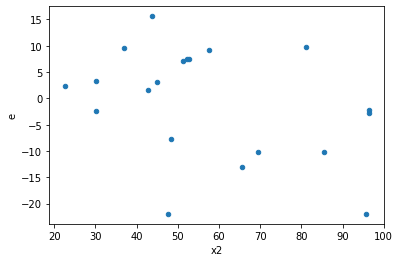

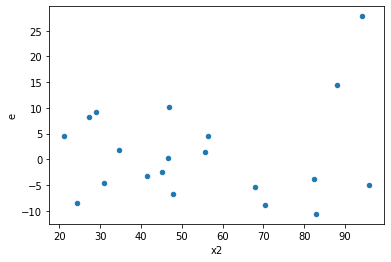

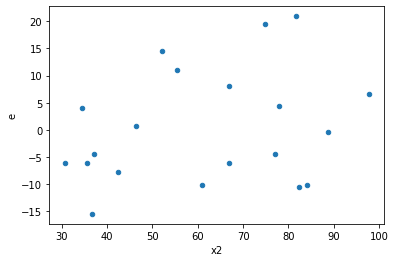

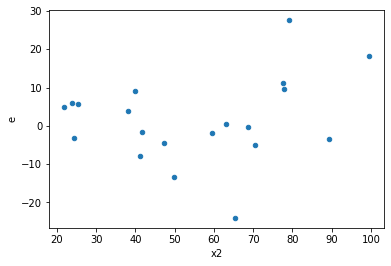

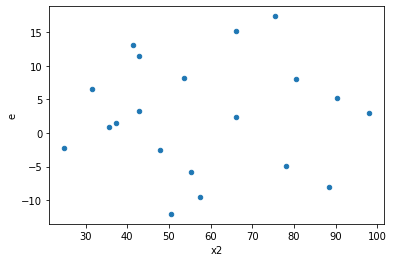

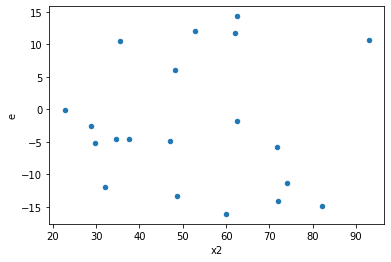

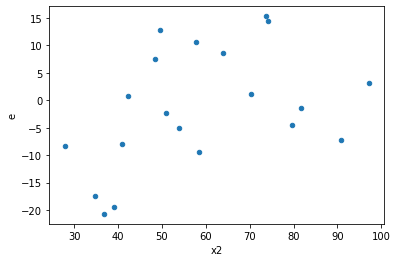

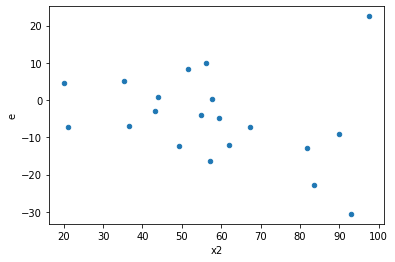

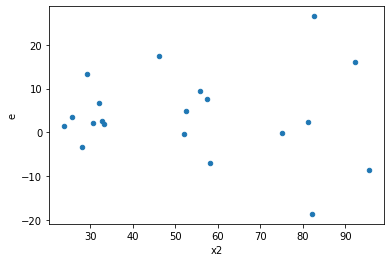

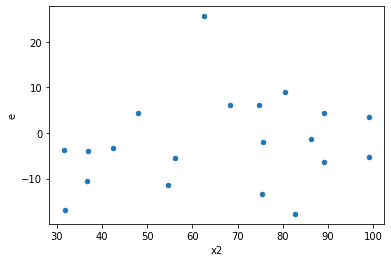

In [11]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
3.0,11.0,3.0,639.1596376954906,1795.2792826250802,58.10542160868096,598.4264275416934,10.29897746155048,0.0799685383288562,0.9600157308355719,0.0399842691644281,Reject005=1 : Homoscedasticity
5.0,12.0,2.0,948.6798535915468,308.33958207139545,79.05665446596224,154.16979103569773,1.9501178247060198,0.7772568537817783,0.6113715731091108,0.38862842689088917,Reject005=1 : Homoscedasticity
6.0,6.0,8.0,493.1008367819311,941.3828972477002,82.18347279698851,117.67286215596252,1.4318312204528119,0.6219551700417674,0.6890224149791163,0.3109775850208837,Reject005=1 : Homoscedasticity
9.0,5.0,9.0,322.97696452005385,1259.1801880330854,64.59539290401077,139.90890978145393,2.165927065253084,0.29618773452402314,0.8519061327379884,0.14809386726201157,Reject005=1 : Homoscedasticity
10.0,9.0,5.0,520.7084400455128,608.3684851754898,57.856493338390315,121.67369703509796,2.103025780070258,0.4274545701057644,0.7862727149471178,0.2137272850528822,Reject005=1 : Homoscedasticity
12.0,7.0,7.0,267.43610914954706,825.8453560408242,38.2051584499353,117.97790800583202,3.0880099125994285,0.15997979182217614,0.9200101040889119,0.07998989591108807,Reject005=1 : Homoscedasticity
13.0,8.0,6.0,866.6065615311066,980.4335435726257,108.32582019138833,163.40559059543762,1.5084639129132391,0.6343013114368166,0.6828493442815917,0.3171506557184083,Reject005=1 : Homoscedasticity
14.0,7.0,7.0,228.42069097077643,318.1756510429818,32.63152728153949,45.45366443471169,1.3929370832858938,0.672905926048492,0.663547036975754,0.336452963024246,Reject005=1 : Homoscedasticity
19.0,5.0,9.0,221.81886489376294,1551.7839017958556,44.363772978752586,172.42043353287283,3.886514197416239,0.07467924673182091,0.9626603766340895,0.03733962336591046,Reject005=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,10.0,4.0,1700.7205706432408,322.6267013599546,170.07205706432407,80.65667533998865,0.47425001338981254,0.30887119691165976,Reject005=1 : Homoscedasticity
1.0,7.0,7.0,1368.1193695535728,466.12033087541016,195.44562422193897,66.58861869648716,0.3407015069361298,0.17876397732848726,Reject005=1 : Homoscedasticity
2.0,11.0,3.0,1139.3111608026836,24.8934934845682,103.57374189115306,8.297831161522733,0.0801152011119095,0.0014585951048007133,Reject005=0 : Heteroscedasticity
3.0,11.0,3.0,639.1596376954906,1795.2792826250802,58.10542160868096,598.4264275416934,10.29897746155048,0.0799685383288562,Reject005=1 : Homoscedasticity
4.0,8.0,6.0,1932.2834738835359,614.1130668664815,241.53543423544198,102.35217781108025,0.42375636574843184,0.25954155516970634,Reject005=1 : Homoscedasticity
5.0,12.0,2.0,948.6798535915468,308.33958207139545,79.05665446596224,154.16979103569773,1.9501178247060198,0.7772568537817783,Reject005=1 : Homoscedasticity
6.0,6.0,8.0,493.1008367819311,941.3828972477002,82.18347279698851,117.67286215596252,1.4318312204528119,0.6219551700417674,Reject005=1 : Homoscedasticity
7.0,6.0,8.0,956.7545869281495,438.7305234971275,159.45909782135826,54.841315437140935,0.34392089373652146,0.21036576636129561,Reject005=1 : Homoscedasticity
8.0,10.0,4.0,1013.8081106401332,165.73055877179894,101.38081106401333,41.432639692949735,0.4086832533504645,0.22897932597308557,Reject005=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      777
Reject005=0 : Heteroscedasticity    223
Name: Result_test, dtype: int64